### 1. Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# CODE HERE

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [3]:
data=pd.read_csv("F:/data science/MACHINE LEARNING/ASSIGNMENTS/Assignment for Linear Regression/linear.csv")

#### Let's explore the top 5 rows of the df


In [4]:
data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
data.shape

(4345, 9)

In [6]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4173.0,19418.746935,25584.242620,600.0,6999.0,11500.0,21700.0,300000.00
Mileage,4345.0,161.237284,105.705797,0.0,86.0,155.0,230.0,980.00
EngineV,4195.0,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Year,4345.0,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.00


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [9]:
data.isnull().sum()/data.shape[0]

Brand           0.000000
Price           0.039586
Body            0.000000
Mileage         0.000000
EngineV         0.034522
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

### As the null values are less than 5% ,we delete them.

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 6. Let's check the descriptives without the missing values


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4025.0,19552.308065,25815.734988,600.0,6999.0,11500.0,21900.0,300000.00
Mileage,4025.0,163.572174,103.394703,0.0,90.0,158.0,230.0,980.00
EngineV,4025.0,2.764586,4.935941,0.6,1.8,2.2,3.0,99.99
Year,4025.0,2006.379627,6.695595,1969.0,2003.0,2007.0,2012.0,2016.00


In [13]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [14]:
data.shape

(4025, 9)

### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

###  **Price Mileage EngineV Year are continuous columns**

### Dealing with outliers
Hint: Use IQR or Z Score

#### 8A. Identify the Outliers which are presented in `Price` Column

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

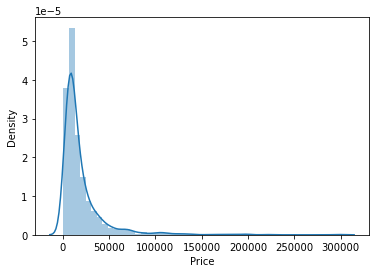

In [15]:
sns.distplot(data["Price"])

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

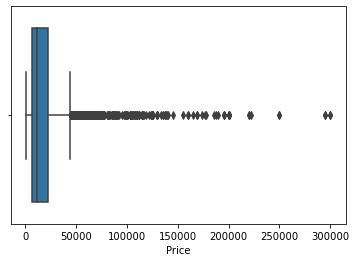

In [16]:
sns.boxplot(data["Price"])

#### 8B. Remove the Outliers which are presented in `Price` Column

## Removing outliers using IQR

In [17]:
q1=np.percentile(data["Price"],25)
q3=np.percentile(data["Price"],75)
iqr=q3-q1
good_value=1.5*iqr
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f"lower bound={lower_bound}")
print(f"upper bound={upper_bound}")
price_median=data.Price.median()


lower bound=-15352.5
upper bound=44251.5


In [18]:
price_median

11500.0

In [19]:
data.loc[(data["Price"]<lower_bound)|(data["Price"]>upper_bound)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
37,BMW,67500.0,crossover,1,2.5,Diesel,yes,2016,X5
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009,G 55 AMG
62,BMW,133000.0,crossover,7,4.4,Petrol,yes,2015,X5 M
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,yes,2006,S 350
...,...,...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016,Q7
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011,X6


In [20]:
data.shape

(4025, 9)

In [21]:
(355/4025)*100

8.819875776397515

### 8% outliers are there in Price column.

### Replacing outliers with Median

In [22]:
data.loc[(data["Price"]<lower_bound)|(data["Price"]>upper_bound),'Price']=price_median

In [23]:
data.loc[(data["Price"]<lower_bound)|(data["Price"]>upper_bound)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model


In [24]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,11500.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

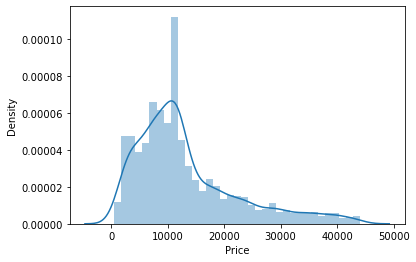

In [25]:
sns.distplot(data["Price"])

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

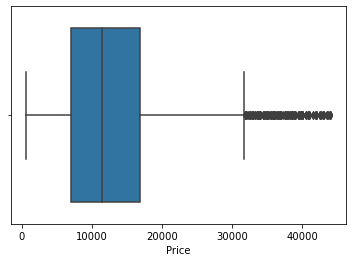

In [26]:
sns.boxplot(data["Price"])

#### 9A. Same identify and remove the outliers in `Milage` column

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

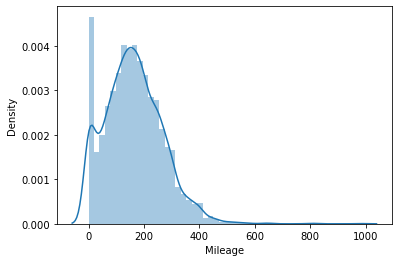

In [27]:
sns.distplot(data["Mileage"])

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

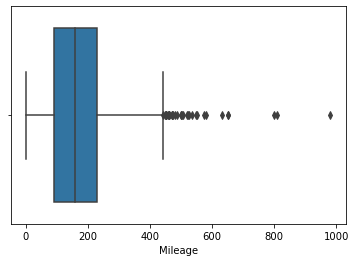

In [28]:
sns.boxplot(data["Mileage"])

## IQR

In [29]:
q1=np.percentile(data["Mileage"],25)
q3=np.percentile(data["Mileage"],75)
iqr=q3-q1
good_value=1.5*iqr
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f"lower bound={lower_bound}")
print(f"upper bound={upper_bound}")
mileage_median=data.Mileage.median()

lower bound=-120.0
upper bound=440.0


In [30]:
mileage_median

158.0

In [31]:
data.loc[(data["Mileage"]<lower_bound)|(data["Mileage"]>upper_bound)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,yes,1991,Passat B3
284,Renault,4900.0,van,472,2.5,Diesel,yes,2000,Master
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,yes,1985,190
899,Volkswagen,6500.0,other,547,1.9,Diesel,yes,1998,T4 (Transporter)
922,Volkswagen,5200.0,van,442,2.4,Diesel,yes,1992,T4 (Transporter)
1198,Volkswagen,8700.0,other,520,2.5,Diesel,yes,1999,T4 (Transporter)
1393,Toyota,2700.0,sedan,550,1.6,Gas,yes,1989,Carina
1410,Volkswagen,4900.0,sedan,500,1.9,Diesel,yes,1995,Passat B4
1813,Mercedes-Benz,8500.0,van,630,2.9,Diesel,yes,1998,Sprinter 312
2043,Mercedes-Benz,3800.0,van,462,2.2,Diesel,no,2001,Sprinter


In [32]:
(372/data.shape[0])*100

9.24223602484472

## Proportion of outliers are 9%

In [33]:
data.loc[(data["Mileage"]<lower_bound)|(data["Mileage"]>upper_bound),'Mileage']=mileage_median

In [34]:
data.loc[(data["Mileage"]<lower_bound)|(data["Mileage"]>upper_bound)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

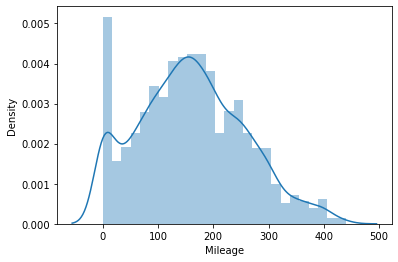

In [35]:
sns.distplot(data["Mileage"])

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

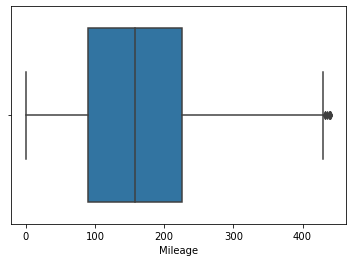

In [36]:
sns.boxplot(data["Mileage"])

#### 10A. Identify and remove the outliers from `EngineV` column



C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

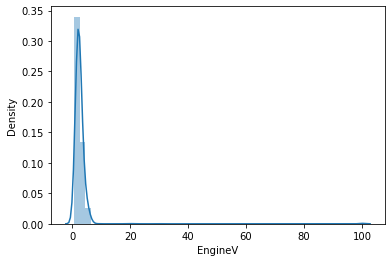

In [37]:
sns.distplot(data["EngineV"])

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineV'>

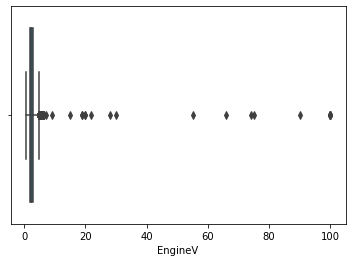

In [38]:
sns.boxplot(data["EngineV"])

## IQR

In [39]:
q1=np.percentile(data["EngineV"],25)
q3=np.percentile(data["EngineV"],75)
iqr=q3-q1
good_value=1.5*iqr
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f"lower bound={lower_bound}")
print(f"upper bound={upper_bound}")
engine_median=data.EngineV.median()

lower bound=2.220446049250313e-16
upper bound=4.8


In [40]:
engine_median

2.2

In [41]:
data.loc[(data["EngineV"]<lower_bound)|(data["EngineV"]>upper_bound)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
5,Mercedes-Benz,11500.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
41,Mercedes-Benz,11500.0,crossover,86,5.5,Petrol,yes,2009,G 55 AMG
48,Mercedes-Benz,29500.0,sedan,134,5.0,Petrol,yes,2008,S 500
53,Mercedes-Benz,13500.0,sedan,317,5.0,Petrol,yes,2001,S 500
...,...,...,...,...,...,...,...,...,...
4265,Mercedes-Benz,27500.0,crossover,152,6.3,Petrol,yes,2007,ML 63 AMG
4278,Mercedes-Benz,29500.0,crossover,253,5.0,Petrol,yes,2003,G 500
4297,Mercedes-Benz,24500.0,sedan,163,5.5,Gas,yes,2007,S 550
4303,Mercedes-Benz,12000.0,sedan,298,5.0,Petrol,yes,2004,S 500


In [42]:
(501/data.shape[0])*100

12.4472049689441

## Proportion of outliers are only 4.2%

In [43]:
data.loc[(data["EngineV"]<lower_bound)|(data["EngineV"]>upper_bound),'EngineV']=engine_median

In [44]:
data.loc[(data["EngineV"]<lower_bound)|(data["EngineV"]>upper_bound)]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model


#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

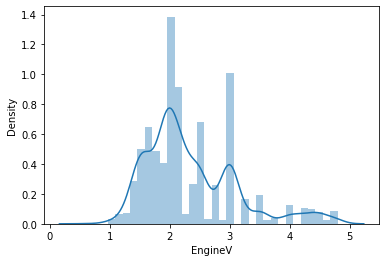

In [45]:
sns.distplot(data["EngineV"])

C:\Users\Lenono\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EngineV'>

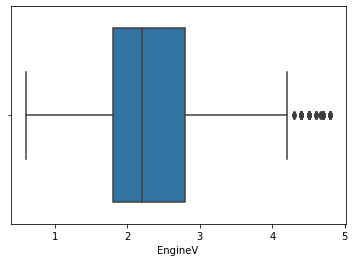

In [46]:
sns.boxplot(data["EngineV"])

#### 10C. Perform Lable & One-Hot Encoding For the Categorical Variable

In [47]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,2.2,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,11500.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


## Label Encoding for Registration column

In [48]:
data["Registration"].value_counts()

yes    3654
no      371
Name: Registration, dtype: int64

In [49]:
label_encoder={"yes":1,"no":0}

In [50]:
data["Registration_encoded"]=data["Registration"].apply(lambda x:label_encoder[x] if x in label_encoder else 2.2)

In [51]:
data["Registration_encoded"].value_counts()

1    3654
0     371
Name: Registration_encoded, dtype: int64

In [52]:
data.drop("Registration",axis=1,inplace=True)

In [53]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model,Registration_encoded
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320,1
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212,1
2,Mercedes-Benz,13300.0,sedan,358,2.2,Gas,2003,S 500,1
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7,1
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4,1
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,2014,Corolla,1
4340,Mercedes-Benz,11500.0,sedan,9,3.0,Diesel,2014,S 350,1
4341,BMW,6500.0,sedan,1,3.5,Petrol,1999,535,1
4342,BMW,8000.0,sedan,194,2.0,Petrol,1985,520,1


## One hot encoding

In [54]:
data["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [55]:
data["Body"].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [56]:
data["Engine Type"].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
lb.fit(data["Engine Type"])
df=pd.DataFrame(lb.transform(data["Engine Type"]),columns=lb.classes_)
data1=pd.concat([data.reset_index(),df],axis=1)
data1.drop(['Engine Type','Other','index'],inplace=True,axis=1)

In [58]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
lb.fit(data['Body'])
df=pd.DataFrame(lb.transform(data['Body']),columns=lb.classes_)
data2=pd.concat([data1.reset_index(),df],axis=1)
data2.drop(['Body','index','other'],axis=1,inplace=True)

In [59]:
data2

,Brand,Price,Mileage,EngineV,Year,Model,Registration_encoded,Diesel,Gas,Petrol,crossover,hatch,sedan,vagon,van
0,BMW,4200.0,277,2.0,1991,320,1,0,0,1,0,0,1,0,0
1,Mercedes-Benz,7900.0,427,2.9,1999,Sprinter 212,1,1,0,0,0,0,0,0,1
2,Mercedes-Benz,13300.0,358,2.2,2003,S 500,1,0,1,0,0,0,1,0,0
3,Audi,23000.0,240,4.2,2007,Q7,1,0,0,1,1,0,0,0,0
4,Toyota,18300.0,120,2.0,2011,Rav 4,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,35,1.6,2014,Corolla,1,0,0,1,0,0,1,0,0
4021,Mercedes-Benz,11500.0,9,3.0,2014,S 350,1,1,0,0,0,0,1,0,0
4022,BMW,6500.0,1,3.5,1999,535,1,0,0,1,0,0,1,0,0
4023,BMW,8000.0,194,2.0,1985,520,1,0,0,1,0,0,1,0,0


In [60]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
lb.fit(data2['Brand'])
df=pd.DataFrame(lb.transform(data['Brand']),columns=lb.classes_)
data3=pd.concat([data2,df],axis=1)
data3.drop(['Brand','Mitsubishi'],axis=1,inplace=True)

In [61]:
data3

,Price,Mileage,EngineV,Year,Model,Registration_encoded,Diesel,Gas,Petrol,crossover,hatch,sedan,vagon,van,Audi,BMW,Mercedes-Benz,Renault,Toyota,Volkswagen
0,4200.0,277,2.0,1991,320,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,7900.0,427,2.9,1999,Sprinter 212,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,13300.0,358,2.2,2003,S 500,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,23000.0,240,4.2,2007,Q7,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,18300.0,120,2.0,2011,Rav 4,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,17900.0,35,1.6,2014,Corolla,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4021,11500.0,9,3.0,2014,S 350,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4022,6500.0,1,3.5,1999,535,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4023,8000.0,194,2.0,1985,520,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [62]:
data3.drop(['Model'],inplace=True,axis=1)

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


## If the Independent Features are inter related to each other it is called Multicollinearity.

## Checking Multicollinearity by Correlation Test.

In [63]:
corr=data3.corr()

<AxesSubplot:>

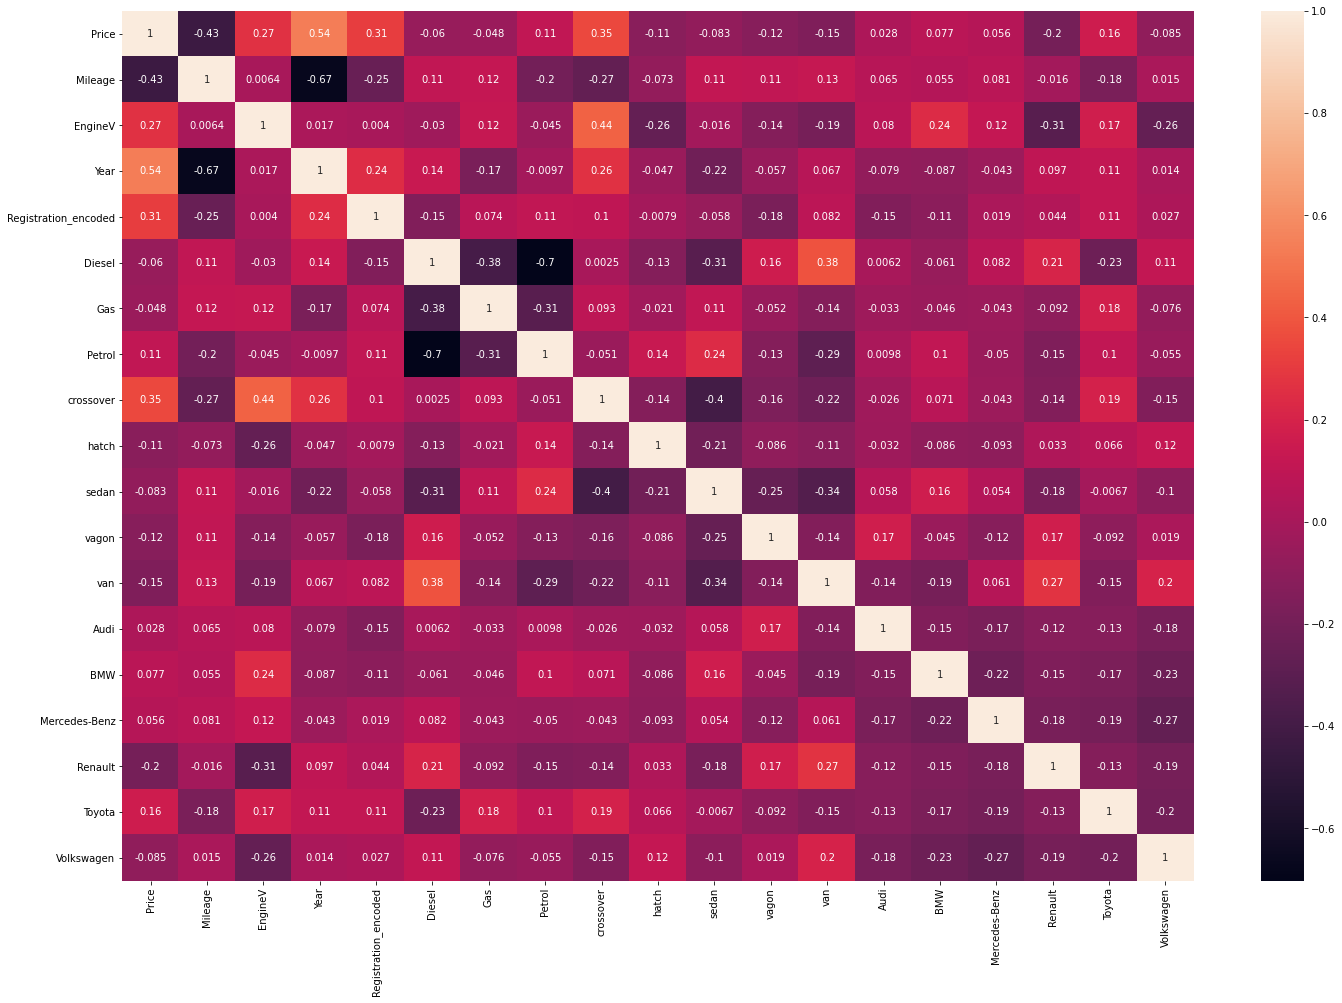

In [64]:
plt.figure(figsize=(24,16))
sns.heatmap(corr,annot=True)

## VIF

In [65]:
data3.dtypes

Price                   float64
Mileage                   int64
EngineV                 float64
Year                      int64
Registration_encoded      int64
Diesel                    int32
Gas                       int32
Petrol                    int32
crossover                 int32
hatch                     int32
sedan                     int32
vagon                     int32
van                       int32
Audi                      int32
BMW                       int32
Mercedes-Benz             int32
Renault                   int32
Toyota                    int32
Volkswagen                int32
dtype: object

In [66]:
x=data3[['Mileage','EngineV','Year',]]

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif=[variance_inflation_factor(x.values,index) for index,col in enumerate(x.columns)]

In [69]:
data_vif=pd.DataFrame(vif,columns=['vif'])

In [70]:
data_vif['columns']=['Mileage','EngineV','Year',]

In [71]:
data_vif

,vif,columns
0,3.722288,Mileage
1,10.370645,EngineV
2,12.959531,Year


In [72]:
data_vif.loc[data_vif['vif']<5,['vif','columns']]

,vif,columns
0,3.722288,Mileage


In [73]:
data_vif.loc[data_vif['vif']>=5,['vif','columns']]

,vif,columns
1,10.370645,EngineV
2,12.959531,Year


## we can also check Multi collinearity by OLS method by checking p-value.

#### 11B. Show the variables which are having Multicollinearity.

In [74]:
data3

,Price,Mileage,EngineV,Year,Registration_encoded,Diesel,Gas,Petrol,crossover,hatch,sedan,vagon,van,Audi,BMW,Mercedes-Benz,Renault,Toyota,Volkswagen
0,4200.0,277,2.0,1991,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,7900.0,427,2.9,1999,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,13300.0,358,2.2,2003,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,23000.0,240,4.2,2007,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,18300.0,120,2.0,2011,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,17900.0,35,1.6,2014,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4021,11500.0,9,3.0,2014,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4022,6500.0,1,3.5,1999,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4023,8000.0,194,2.0,1985,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0


### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [75]:
x=data3.iloc[:,1:17]

In [76]:
y=data3.iloc[:,0]

In [77]:
import statsmodels.api as sm

In [78]:
x=sm.add_constant(x)

In [79]:
x.head()

,const,Mileage,EngineV,Year,Registration_encoded,Diesel,Gas,Petrol,crossover,hatch,sedan,vagon,van,Audi,BMW,Mercedes-Benz,Renault
0,1.0,277,2.0,1991,1,0,0,1,0,0,1,0,0,0,1,0,0
1,1.0,427,2.9,1999,1,1,0,0,0,0,0,0,1,0,0,1,0
2,1.0,358,2.2,2003,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1.0,240,4.2,2007,1,0,0,1,1,0,0,0,0,1,0,0,0
4,1.0,120,2.0,2011,1,0,0,1,1,0,0,0,0,0,0,0,0


In [80]:
model=sm.OLS(y,x)

In [81]:
results=model.fit()

In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     217.8
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:35:12   Log-Likelihood:                -41172.
No. Observations:                4025   AIC:                         8.238e+04
Df Residuals:                    4008   BIC:                         8.248e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.255e+06   4.62e+04    -27.188      0.000   -1.35e+06   -1.16e+06
Mileage                 -4.4574      1.598     -2.789      0.005      -7.590      -1.325
EngineV               1198.5530    173.874      6.893      0.000     857.664    1539.442
Year                   627.9478     22.937     27.378      0.000     582.979     672.916
Registration_encoded  6415.6482    398.903     16.083      0.000    5633.577    7197.719
Diesel                 -35.5466    678.638     -0.052      0.958   -1366.055    1294.961
Gas                    120.6792    720.195      0.168      0.867   -1291.304    1532.663
Petrol                 928.6478    680.196      1.365      0.172    -404.914    2262.209
crossover             1570.3406    436.642      3.596      0.000     714.280    2426.401
hatch                -2707.5192    554.472     -4.883      0.000   -3794.592   -1620.446
sedan                -1276.7320    386.697     -3.302      0.001   -2034.873    -518.591
vagon                -1322.7584    507.946     -2.604      0.009   -2318.615    -326.902
van                  -3025.6516    460.362     -6.572      0.000   -3928.216   -2123.087
Audi                  2905.1820    387.017      7.507      0.000    2146.414    3663.950
BMW                   2536.2227    338.019      7.503      0.000    1873.518    3198.928
Mercedes-Benz         1932.1213    299.282      6.456      0.000    1345.362    2518.881
Renault              -3793.7746    386.664     -9.812      0.000   -4551.851   -3035.698
==============================================================================
Omnibus:                      680.408   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.814
Skew:                           0.985   Prob(JB):                         0.00
Kurtosis:                       5.223   Cond. No.                     8.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
results.pvalues

const                   1.567588e-149
Mileage                  5.304834e-03
EngineV                  6.308053e-12
Year                    1.972393e-151
Registration_encoded     1.887873e-56
Diesel                   9.582291e-01
Gas                      8.669343e-01
Petrol                   1.722462e-01
crossover                3.265358e-04
hatch                    1.085240e-06
sedan                    9.696452e-04
vagon                    9.244740e-03
van                      5.589460e-11
Audi                     7.434771e-14
BMW                      7.627987e-14
Mercedes-Benz            1.204507e-10
Renault                  1.794735e-22
dtype: float64

In [84]:
np.round(results.pvalues,3)

const                   0.000
Mileage                 0.005
EngineV                 0.000
Year                    0.000
Registration_encoded    0.000
Diesel                  0.958
Gas                     0.867
Petrol                  0.172
crossover               0.000
hatch                   0.000
sedan                   0.001
vagon                   0.009
van                     0.000
Audi                    0.000
BMW                     0.000
Mercedes-Benz           0.000
Renault                 0.000
dtype: float64

#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x=data3.iloc[:,1:]
y=data3.iloc[:,1]

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=78)

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [136]:
from sklearn.linear_model import LinearRegression


In [137]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

## Metrics

In [141]:
from sklearn.metrics import r2_score,mean_squared_error
print(f'r2={r2_score(y_test,y_pred)}')
print(f'mean squared error={np.round(mean_squared_error(y_test,y_pred),5)}')

r2=1.0
mean squared error=0.0


#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [143]:
from sklearn.linear_model import Lasso
lasso_r=Lasso(alpha=1)
lasso_r.fit(x_train,y_train)
y_pred_lasso=lasso_r.predict(x_test)

print(f'r2={r2_score(y_test,y_pred_lasso)}')
print(f'mse={mean_squared_error(y_test,y_pred_lasso)}')

r2=0.9999999884049874
mse=0.00011047192902131735


#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [145]:
from sklearn.linear_model import Ridge
ridge_r=Ridge(alpha=3)
ridge_r.fit(x_train,y_train)
y_pred_ridge=ridge_r.predict(x_test)

print(f'r2={r2_score(y_test,y_pred_ridge)}')
print(f'mse={mean_squared_error(y_test,y_pred_ridge)}')

r2=0.9999999999999805
mse=1.8601665524039594e-10


#### 16. Perform Residual Analysis Give The Interpretations.

<module 'matplotlib.pyplot' from 'C:\\Users\\Lenono\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

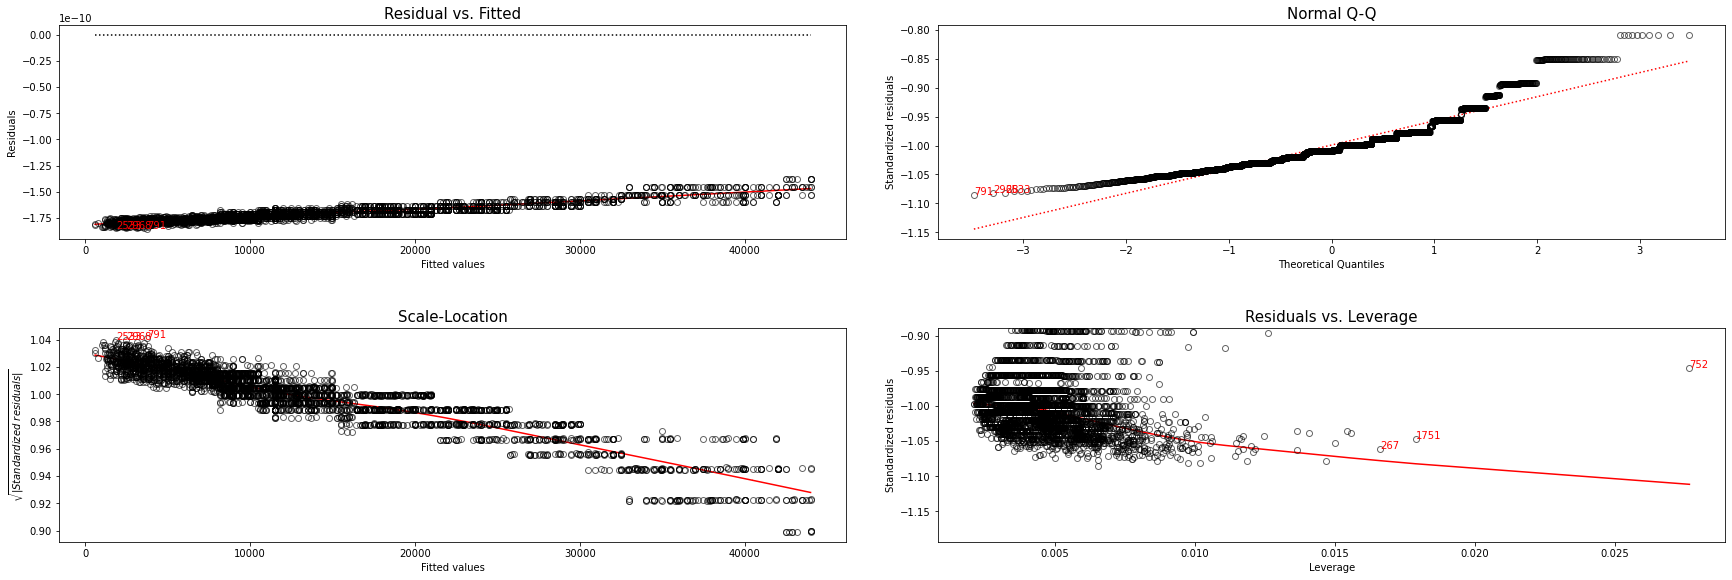

In [147]:
import lmdiag
plt.figure(figsize=(24,8))
lmdiag.plot(results)

## The model got good accuracy